<a href="https://colab.research.google.com/github/tocom242242/aifx_blog_codes/blob/master/rnn_sin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Kerasで単純なRNN（リカレントニューラルネットワーク）を試す](https://www.tcom242242.net/entry/python-basic/keras/keras%e3%81%a7%e5%8d%98%e7%b4%94%e3%81%aarnn%ef%bc%88%e3%83%aa%e3%82%ab%e3%83%ac%e3%83%b3%e3%83%88%e3%83%8b%e3%83%a5%e3%83%bc%e3%83%a9%e3%83%ab%e3%83%8d%e3%83%83%e3%83%88%e3%83%af%e3%83%bc%e3%82%af/)

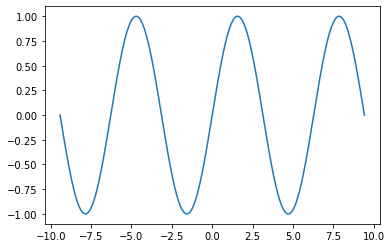

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3*np.pi,3*np.pi,1000)
y = np.sin(x)
plt.plot(x, y) # 確認。別にプロットしなくていい

In [2]:
input_len = 5 # 入力の長さ
X, Y = [], []
for i, _ in enumerate(x):
    if (i+input_len+1 >= len(x)):
        break
    X.append(y[i:i+input_len])
    Y.append(y[i+input_len+1])

In [3]:
split_index = int(len(X)*0.8)

train_x = X[:split_index]
train_y = Y[:split_index]
test_x = X[split_index:]
test_y = Y[split_index:]

In [4]:
train_x = np.array(train_x).reshape(len(train_x),-1,1)
test_x = np.array(test_x).reshape(len(test_x), -1, 1)
train_y = np.array(train_y).reshape(-1,1)
test_y = np.array(test_y).reshape(-1,1)

In [5]:
from keras.layers import Dense, Activation, SimpleRNN
from keras.models import Sequential

input_shape = (len(train_x[0]), 1)
model = Sequential()
model.add(SimpleRNN(100, return_sequences=False, input_shape=input_shape))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")

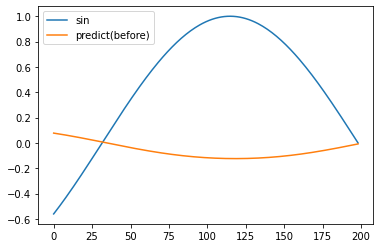

In [6]:
plt.plot(np.arange(len(test_y)), test_y, label="sin")
predict_y = model.predict(test_x)
plt.plot(np.arange(len(test_y)), predict_y, label="predict(before)")
plt.legend()
plt.show()

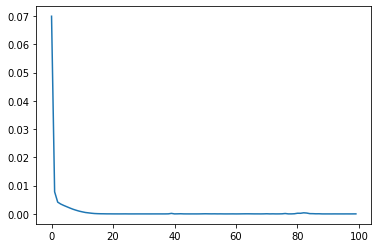

In [7]:
hist = model.fit(train_x, train_y, batch_size=32, epochs=100, verbose=0)
history = hist.history
plt.plot(hist.epoch, history["loss"], label="loss")

In [8]:
score = model.evaluate(test_x, test_y)
print(score)
#=>8.943095873296466e-05

7/7 [==============================] - 0s 2ms/step - loss: 8.5914e-05
8.591439836891368e-05


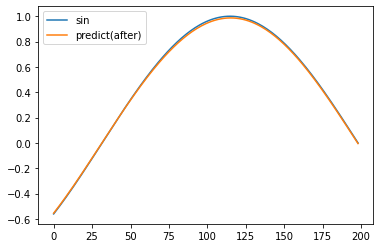

In [9]:
plt.plot(np.arange(len(test_y)), test_y, label="sin")
predict_y = model.predict(test_x)
plt.plot(np.arange(len(test_y)), predict_y, label="predict(after)")
plt.legend()
plt.show()